# Bike sharing system

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

Essentially, The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

   ### Details
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



	Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [691]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


In [692]:
df_bike = pd.read_csv("data.csv")

#### Inspect the various aspects of the housing dataframe

In [693]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [694]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [695]:
df_bike.shape

(730, 16)

In [696]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleanup


In [697]:
#df_bike = df_bike.set_index('instant')
df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df_bike.head()




,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [698]:
df_bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df_bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df_bike.mnth = df_bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df_bike.weekday = df_bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [699]:
df_bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [700]:
# No null data identified 
df_bike.nunique() 


season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

## Visualising the Data


In [701]:
import matplotlib.pyplot as plt
import seaborn as sns

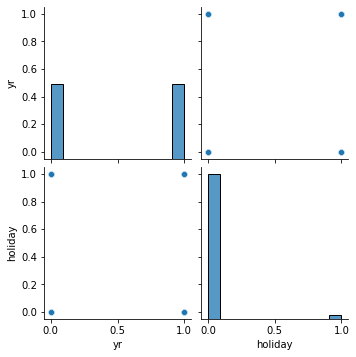

In [702]:
d = df_bike[['season', 'yr', 'mnth', 'holiday']]
sns.pairplot(d)

plt.show()

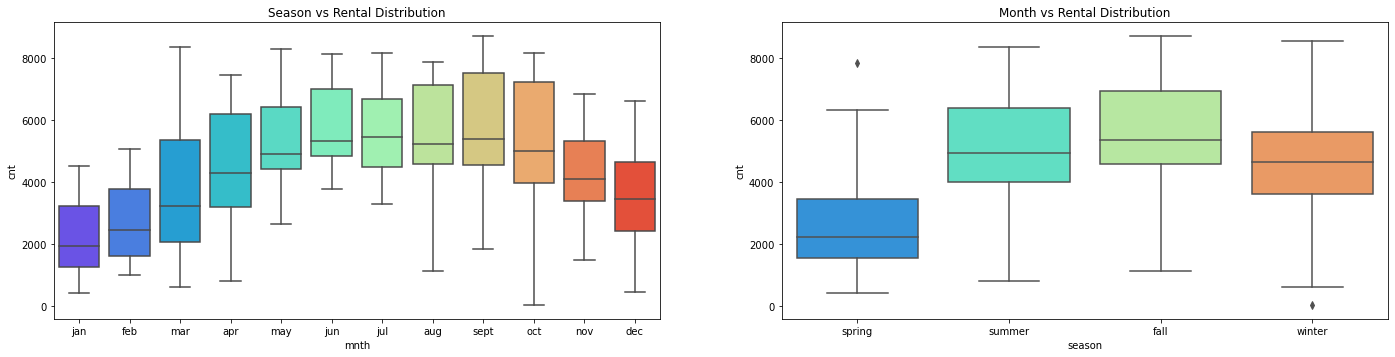

In [703]:

plt.figure(figsize=(50, 12))
plt.subplot(2,4,1)
df_season = df_bike.groupby(['mnth']).agg({'cnt':'sum'})
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike,palette='rainbow' ).set_title('Season vs Rental Distribution')

plt.subplot(2,4,2)

df_season = df_bike.groupby(['season']).agg({'cnt':'sum'})
sns.boxplot(x = 'season', y = 'cnt', data = df_bike,palette='rainbow' ).set_title('Month vs Rental Distribution')
plt.show()


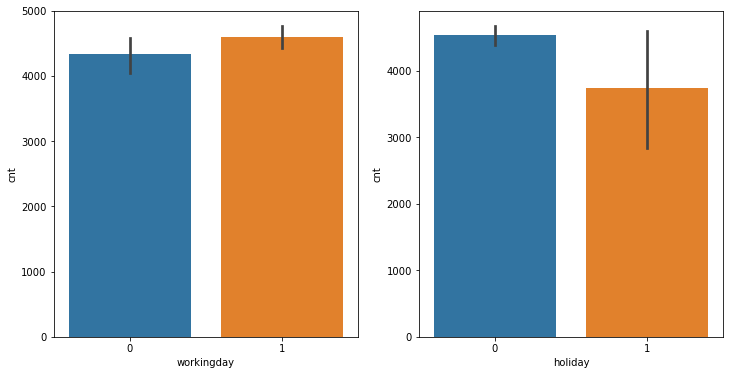

In [704]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot('workingday','cnt',data=df_bike)
    plt.subplot(1,2,2)
    sns.barplot('holiday','cnt',data=df_bike)
    plt.show()


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

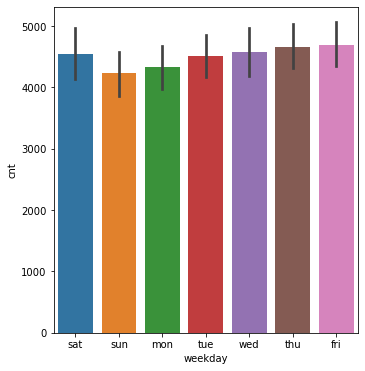

In [705]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot('weekday','cnt',data=df_bike)


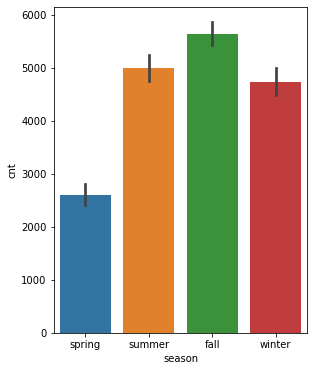

In [706]:
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot('season','cnt',data=df_bike)
    plt.show()

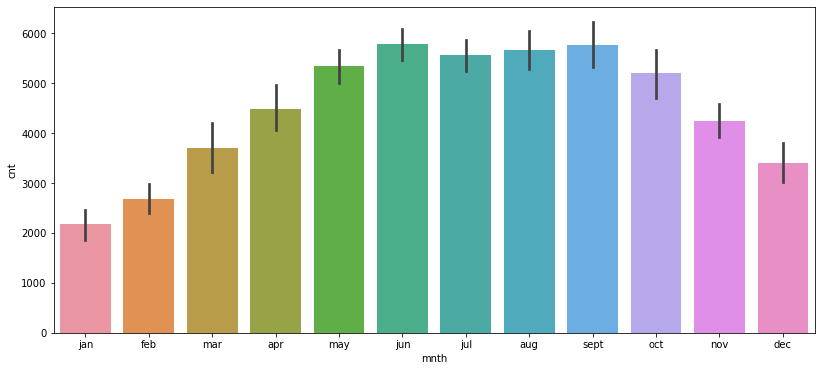

In [707]:
    plt.figure(figsize = (30,6))
    plt.subplot(1,2,1)
    sns.barplot('mnth','cnt',data=df_bike)
    plt.show()

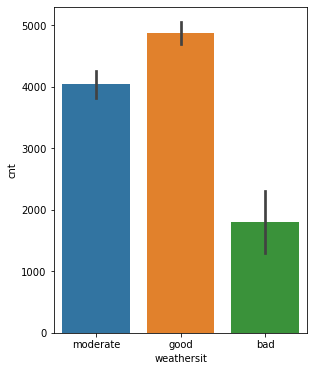

In [708]:
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot('weathersit','cnt',data=df_bike)
    plt.show()
    	# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


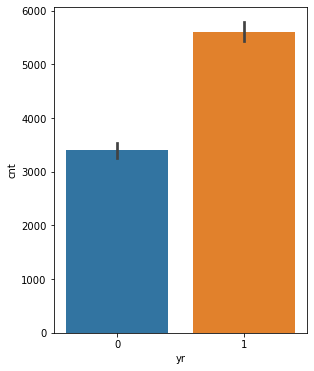

In [709]:
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot('yr','cnt',data=df_bike)
    plt.show()
    #yr : year (0: 2018, 1:2019)


### FINDINGS
- Observation: Booking seemed to be almost equal either on working day or non-working day.
- Observation: Thu, Fir, Sat  have more number of bookings as compared to the start of the week.
- Observation: Fall season seems to have attracted more booking. 
- Observation: Most number of bookings has been dont in the month of may, june, july, aug, sep and oct
- Observation: Large number of bookings is done at Clear weather situations
- Observation: Compared to 2018, more booking is done at year 2019(5500 bookings)






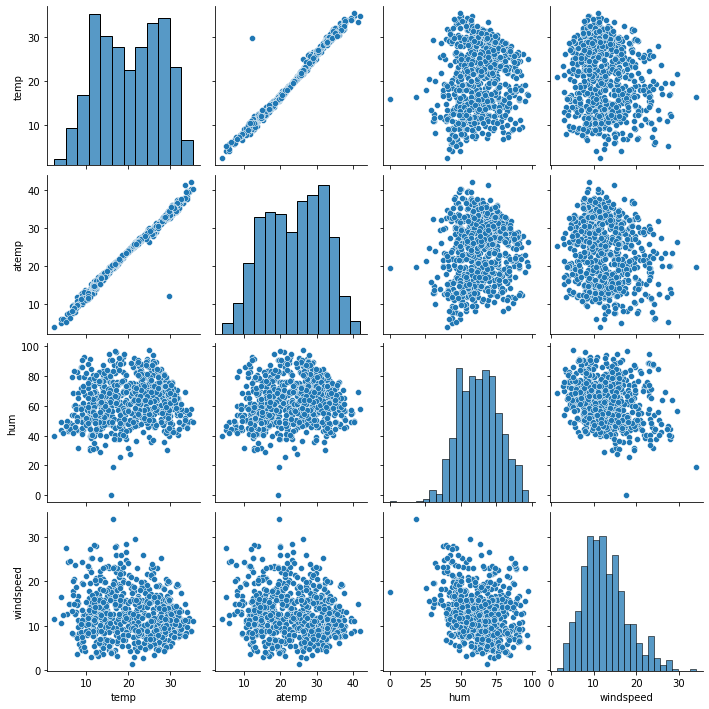

In [710]:
sns.pairplot(data=df_bike,vars=['temp','atemp','hum','windspeed'])
plt.show()


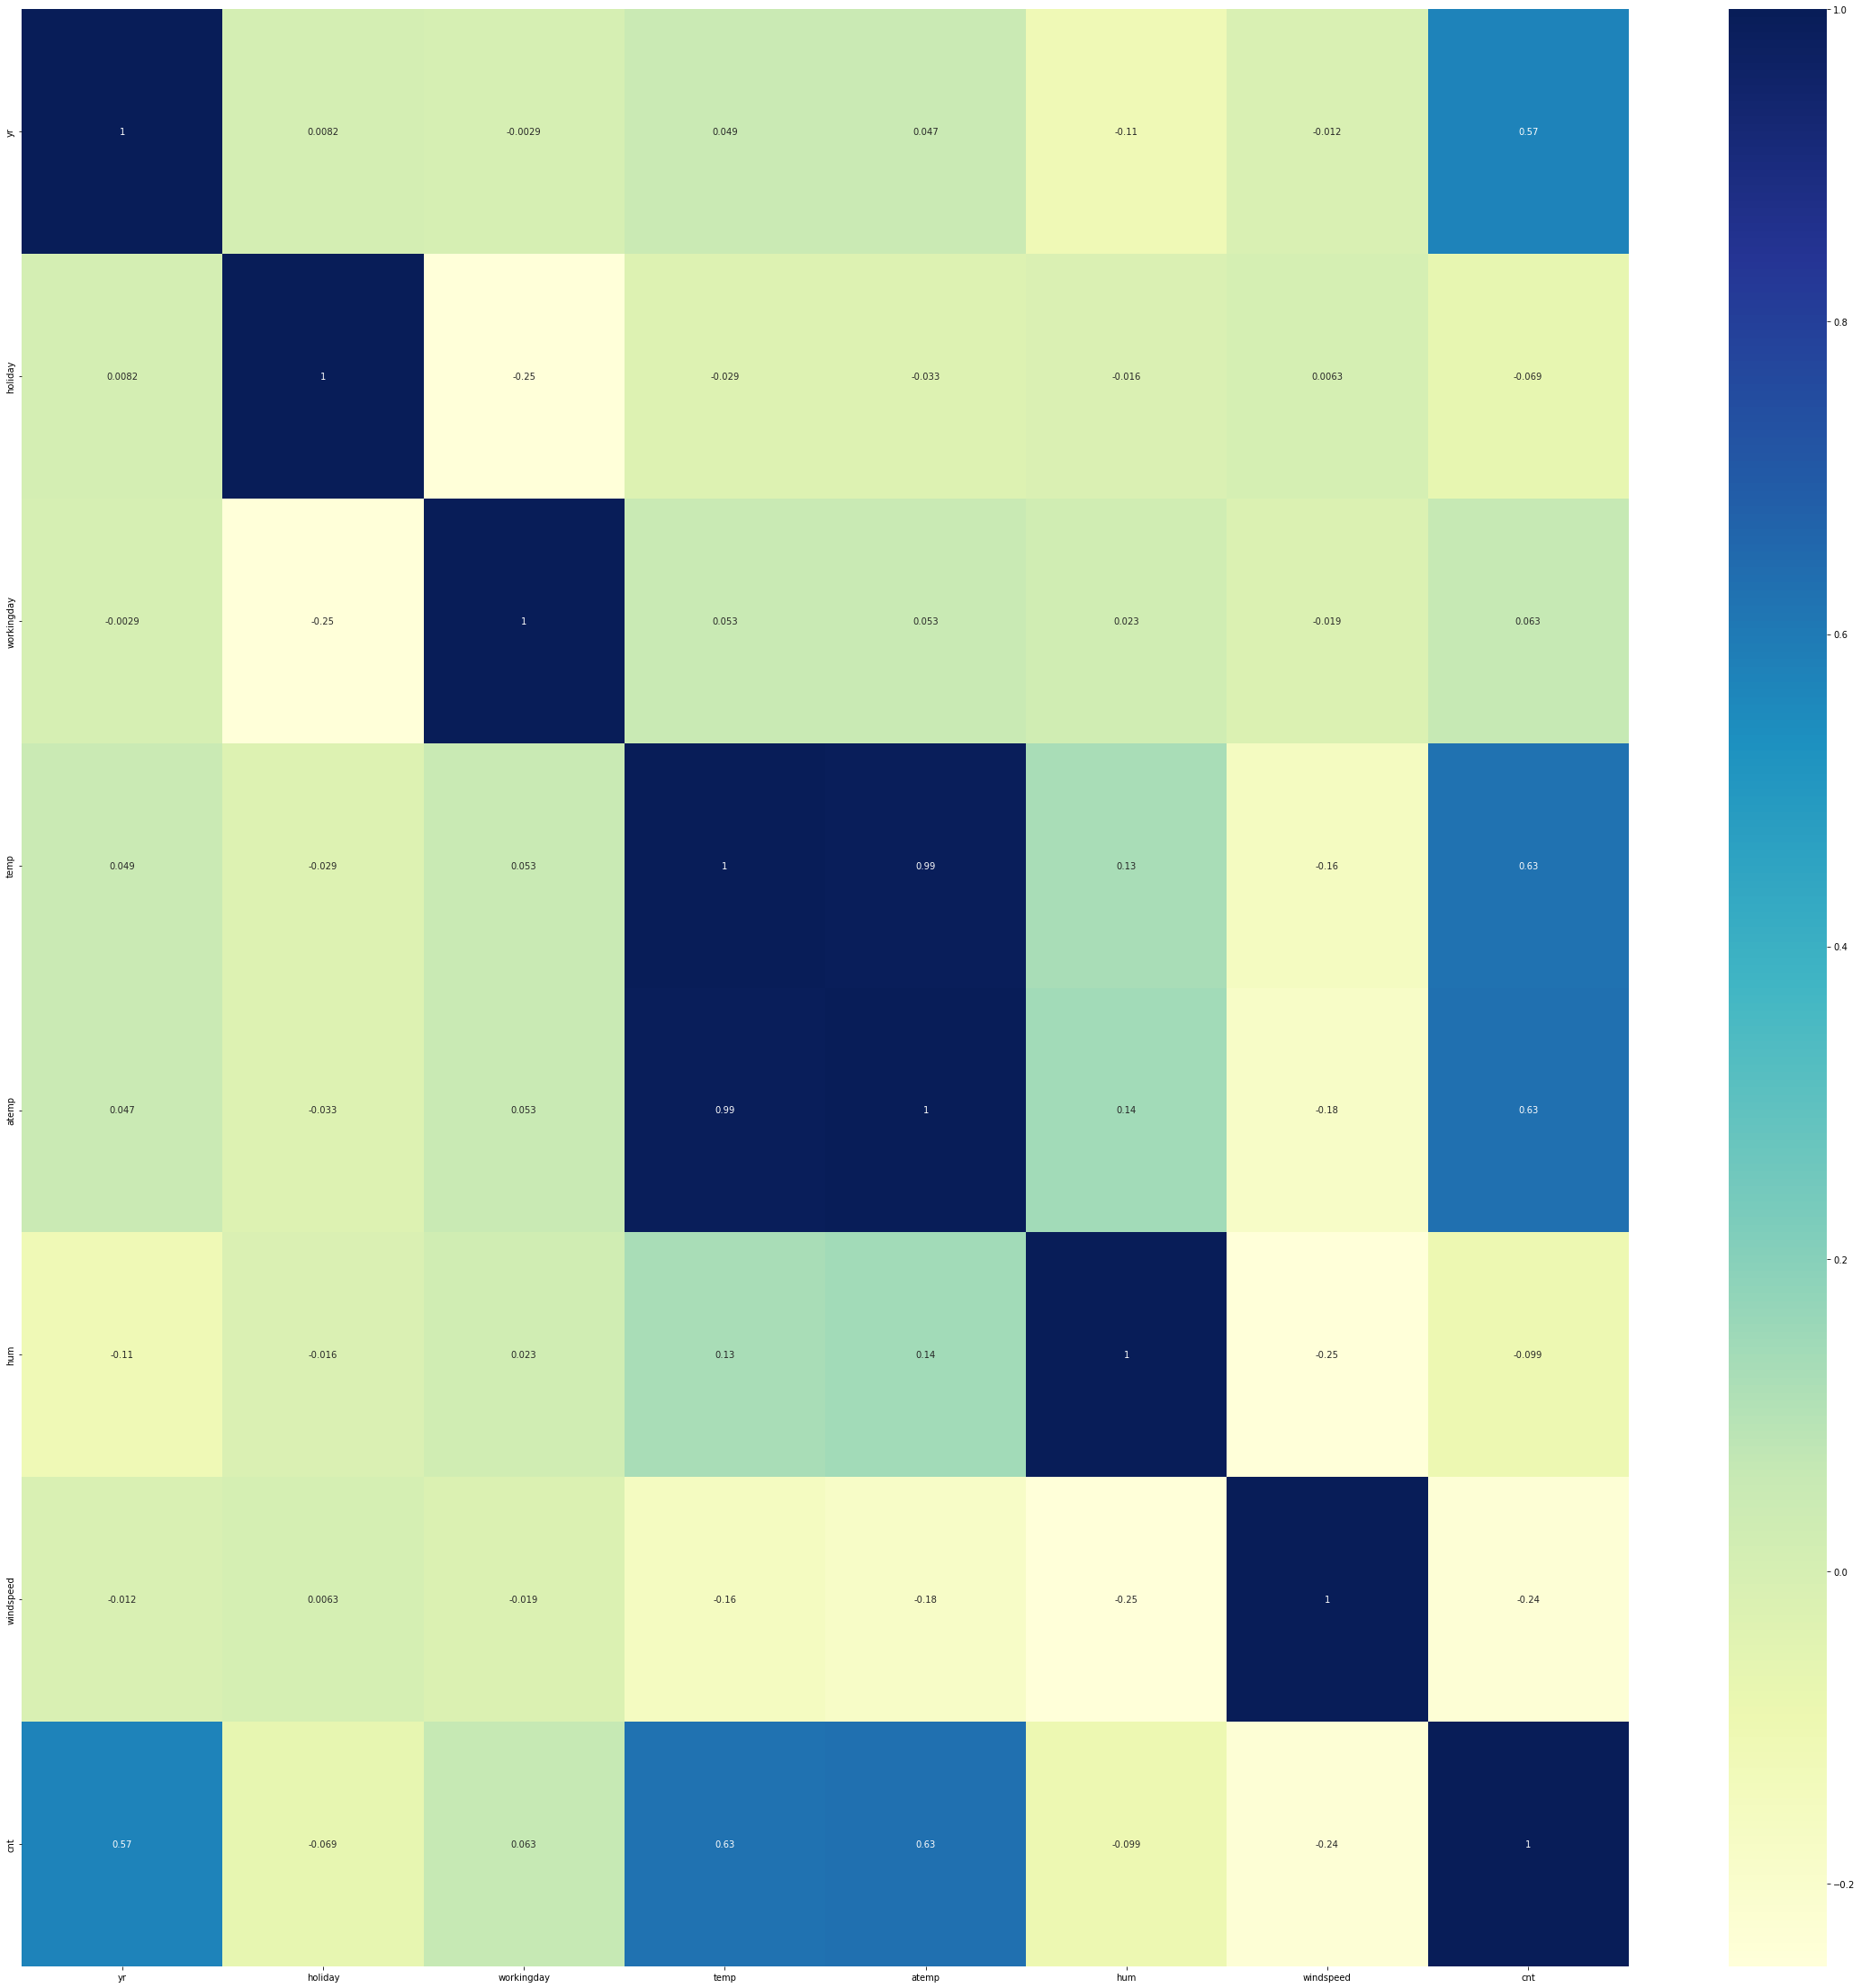

In [711]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 40))
sns.heatmap(df_bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Observation : Highly correlation between temp and atemp, 

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


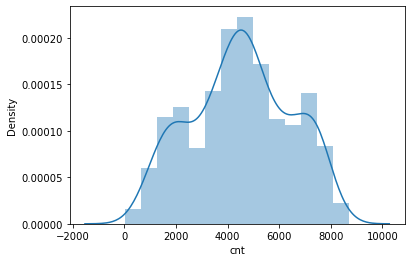

In [712]:
#1) The model should be built taking this 'cnt' as the target variable.

print(df_bike['cnt'].describe())
sns.distplot(df_bike['cnt']);



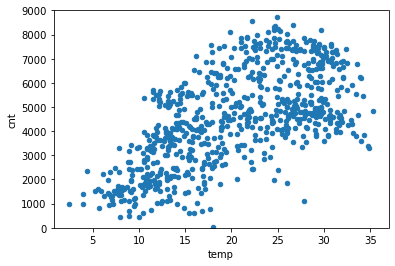

In [713]:
# Check temp vs cnt
df_bike['temp'].value_counts()
data = pd.concat([df_bike['cnt'], df_bike['temp']], axis=1)

data.plot.scatter(x='temp', y='cnt', ylim=(0,9000));

# DRAFT: It is showing  there is good relation between 'temp' and 'cnt'


In [714]:
df_bike = pd.get_dummies(data=df_bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)


In [715]:
df_bike.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


# Model building


In [716]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import statsmodels.api as sm


In [717]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

## 1. Splitting Data:  Training and Testing Sets


In [718]:
df_bike.nunique() #gives info about unique values present in data


yr                       2
holiday                  2
workingday               2
temp                   498
atemp                  689
hum                    594
windspeed              649
cnt                    695
season_spring            2
season_summer            2
season_winter            2
mnth_aug                 2
mnth_dec                 2
mnth_feb                 2
mnth_jan                 2
mnth_jul                 2
mnth_jun                 2
mnth_mar                 2
mnth_may                 2
mnth_nov                 2
mnth_oct                 2
mnth_sept                2
weekday_mon              2
weekday_sat              2
weekday_sun              2
weekday_thu              2
weekday_tue              2
weekday_wed              2
weathersit_good          2
weathersit_moderate      2
dtype: int64

In [719]:
#y to contain only target variable
y=df_bike.pop('cnt')

#X is all remainign variable also our independent variables
X=df_bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [720]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [721]:
print(X_train.shape)
print(X_test.shape)


(511, 29)
(219, 29)


### Rescaling the Features


In [722]:
from sklearn.preprocessing import MinMaxScaler

num_vars = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [723]:
X_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


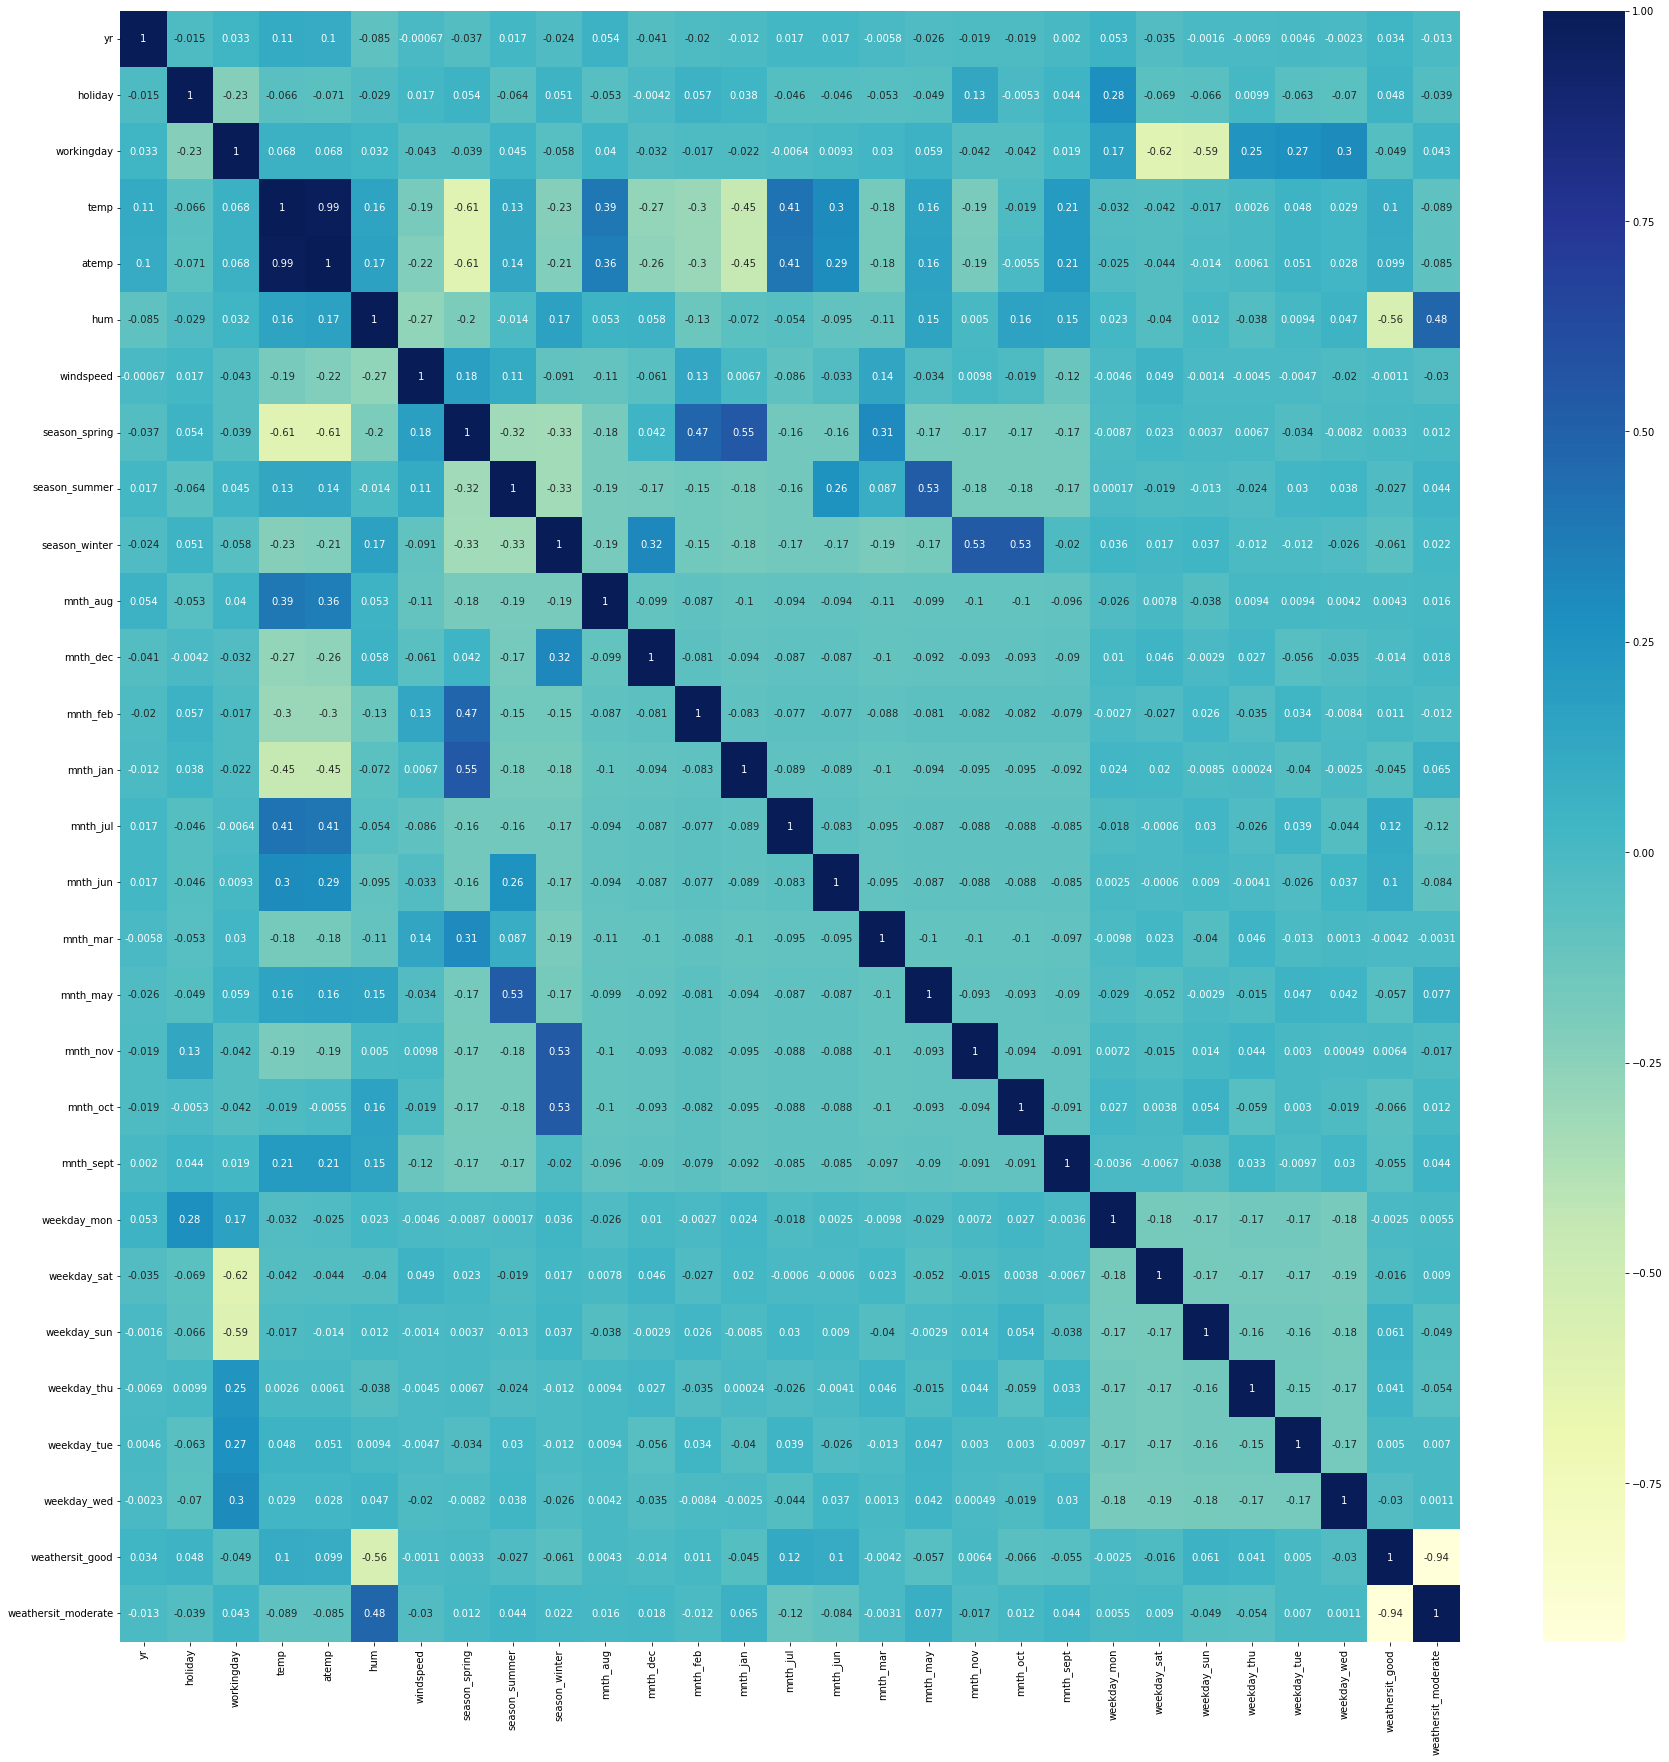

In [724]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Findings :
- Misty and humidity shows the correlation
- temp and atemp shows the correlation
- Winter season with october and november 
- Spring season with jan and Feb month



### Model build using Recurrsive feature eliminaiton

In [725]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [726]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [727]:
X_train.describe()
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#To reduce model complexity, always start by removing features with close to 0 weights. Since all weights are multiplied by
# the values of features, such small weights contribute very little to the overall predictions.


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [728]:
# df_bike['season']= df_bike['season'].astype('category')
# df_bike['mnth']= df_bike['mnth'].astype('category')
# df_bike['yr']= df_bike['yr'].astype('category')
# df_bike['weathersit']= df_bike['weathersit'].astype('category')
# df_bike['weekday']= df_bike['weekday'].astype('category')
# seasson_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# df_bike.season = df_bike['season'].cat.rename_categories(seasson_map)

# month_map ={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
# df_bike.month = df_bike.mnth.cat.rename_categories(month_map)

# weathersit_map = {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}
# df_bike.weathersit = df_bike.weathersit.cat.rename_categories(weathersit_map)

# weekday_map = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
# df_bike.weekday = df_bike.weekday.cat.rename_categories(weekday_map)

# year_map = {0:'2018',1:'2019'}
# df_bike.year = df_bike.yr.cat.rename_categories(year_map)

In [729]:
import statsmodels.api as sm

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

- We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
- if in a linear regression model p values are less than 0.05 and VIF is less than 5 it should be droped



In [730]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [731]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [732]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [733]:
#We create model and manually eliminate these columns one by one

column = X_train.columns[rfe.support_]
print(column)


#Eliminated coloumns
print(X_train.columns[~rfe.support_])


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')
Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')


### Test 1

In [734]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.50e-191
Time:                        20:53:11   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.1618    

## Test2

In [735]:
#Remove jan month  Got higher -ve number

cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.84e-189
Time:                        20:53:11   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1139.6258    

## Test3

In [736]:
#Remove weathersit_good for higher VIF

cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.03e-163
Time:                        20:53:11   Log-Likelihood:                -4190.3
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     498   BIC:                             8462.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1326.2517    

## Test 4

In [737]:
#Remove Holiday with -ve coef and larger P value

cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.70e-164
Time:                        20:53:11   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8407.
Df Residuals:                     499   BIC:                             8458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1263.8103    

## Test 5

In [738]:
#Remove July month  with -ve coef and high p value

cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.17e-163
Time:                        20:53:11   Log-Likelihood:                -4194.8
No. Observations:                 511   AIC:                             8412.
Df Residuals:                     500   BIC:                             8458.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1182.9572    

## Test 6

In [739]:
#Remove temp  with High p value

cols = ['yr', 'workingday',  'windspeed',
       'season_spring', 'season_summer', 'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.18e-132
Time:                        20:53:11   Log-Likelihood:                -4272.4
No. Observations:                 511   AIC:                             8565.
Df Residuals:                     501   BIC:                             8607.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4655.1084    

## Test 7

In [740]:

cols = ['yr', 'workingday',  'windspeed',
       'season_spring',  'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate']
build_model(cols)
calculateVIF(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          8.90e-132
Time:                        20:53:11   Log-Likelihood:                -4275.4
No. Observations:                 511   AIC:                             8569.
Df Residuals:                     502   BIC:                             8607.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4514.2591    

## Test 8

In [741]:
cols = ['yr', 'workingday',  'windspeed',
       'season_spring',  'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate','temp']
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.10e-161
Time:                        20:53:11   Log-Likelihood:                -4203.5
No. Observations:                 511   AIC:                             8427.
Df Residuals:                     501   BIC:                             8469.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1905.4915    

## Test 9

In [742]:
final_cols = ['yr', 'workingday',  
       'season_spring',  'season_winter',
        'mnth_sept', 'weekday_sat', 
       'weathersit_moderate','temp','weathersit_moderate']
build_model(final_cols)
calculateVIF(final_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.94e-155
Time:                        20:53:11   Log-Likelihood:                -4220.4
No. Observations:                 511   AIC:                             8459.
Df Residuals:                     502   BIC:                             8497.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1286.6520    

### Build final  model 

In [743]:
lr1 = LinearRegression()
lr_model= lr1.fit(X_train[final_cols],y_train)


In [744]:
y_train_pred = lr_model.predict(X_train[final_cols])


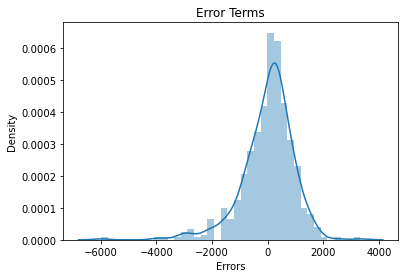

In [745]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

plot_res_dist(y_train, y_train_pred)


### Prediction of values on test dataset


## Model Evaluation

In [746]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_train,y_train_pred)


0.7706141706354592

### Prediction on test dataset

In [747]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [748]:
y_test_pred = lr_model.predict(X_test[final_cols])


### Evaluating the test data



In [749]:
r2_score(y_test,y_test_pred)


0.7753442385518945

Text(0, 0.5, 'y_pred')

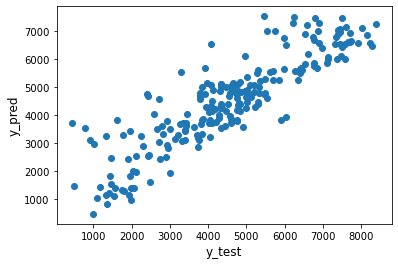

In [750]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12) 


### Conclusion


Features which effects bike prediction are
- Weekends/Holiday
- Temperature
- season ( winter. spring)
- weathersit
- Year

